Step:1 Loading and merging the datasets. As you can see the dates are not matching stock market has d-m-y structure, while samsung has y-m-d structure

In [45]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')
print(stock_prices.head())
print(samsung_stock.head())


   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  ...        5,89,498         10580.0      

Finding  common dates

In [46]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')
global_phone_sales = pd.read_csv('global_phone_sales.csv', delimiter=';')

#Convert dates to allign with other datasets
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')


print(stock_prices['Date'].min(), stock_prices['Date'].max())
print(samsung_stock['Date'].min(), samsung_stock['Date'].max())

# Check for common dates
common_dates_1 = pd.merge(stock_prices[['Date']], samsung_stock[['Date']], on='Date', how='inner')
print(f"Common dates between stock_prices and samsung_stock: {common_dates_1.shape[0]}")







2019-02-04 00:00:00 2024-02-02 00:00:00
2019-01-02 00:00:00 2024-03-28 00:00:00
Common dates between stock_prices and samsung_stock: 1177


Converting the samsung stock values from KRW to USD

In [47]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Ensure the converted values
print(samsung_stock.head())


        Date    Open    High     Low   Close  Adj Close    Volume
0 2019-01-02  29.156  29.156  28.527  28.675  24.994356   7847664
1 2019-01-03  28.342  28.527  27.713  27.824  24.252584  12471493
2 2019-01-04  27.713  27.824  27.269  27.713  24.155829  14108958
3 2019-01-07  28.120  28.786  27.972  28.675  24.994356  12748997
4 2019-01-08  28.120  29.008  28.083  28.194  24.575085  12756554


Merging the Datasets

In [23]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Inspect the merged dataset
print(merged_data.head())
print(merged_data.shape)


   Unnamed: 0       Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0 2024-02-02              2.079               NaN   
1           1 2024-02-01              2.050          161340.0   
2           2 2024-01-31              2.100          142860.0   
3           3 2024-01-30              2.077          139750.0   
4           4 2024-01-29              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Meta_Price   Meta_Vol. Gold_Price  Gold_Vol.    Open  \
0       42650.0  ...     474.99  84710000.0   2,053.70   

Supervised Learning Model for Samsung: Random Forest Regressor: Step 1 --> finding the optimal estimator value

Best number of estimators: 300
Random Forest Mean Squared Error for Samsung: 2.590846147911629
        feature  importance
0  Copper_Price    0.693673
2   Apple_Price    0.162856
1  Silver_Price    0.143470


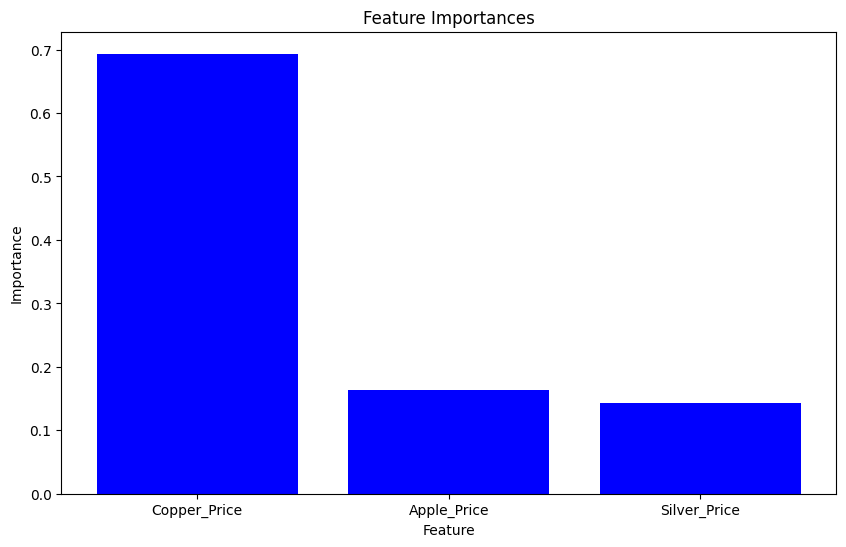

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Select features and target variable for ML
X = merged_data[['Copper_Price', 'Silver_Price', 'Apple_Price']]  # features
y = merged_data['Close']  # Target variable for Samsung stock price in USD

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define a range of n_estimators to search
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best number of estimators
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best number of estimators:", best_n_estimators)

# Train the Random Forest model with the optimal number of estimators
optimal_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
optimal_rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = optimal_rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error for Samsung: {rf_mse}')

# Feature importance
importances = optimal_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'], color='b', align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


Supervised Learning Model for Samsung: Random Forest Regressor: Step 2 --> applying the estimator value found above

In [56]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Select features and target variable for ML
X = merged_data[['Copper_Price', 'Silver_Price', 'Apple_Price']]  # Example features
y = merged_data['Close']  # Target variable for Samsung stock price in USD

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error for Samsung: {rf_mse}')

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance_df)


Random Forest Mean Squared Error for Samsung: 2.590846147911629
        feature  importance
0  Copper_Price    0.693673
2   Apple_Price    0.162856
1  Silver_Price    0.143470


Supervised Learning Model for Apple: Random Forest Regressor: Step 1 --> finding the optimal estimator value

Best number of estimators: 100
Random Forest Mean Squared Error for Apple: 101.31075466555096
        feature  importance
0  Copper_Price    0.863220
2         Close    0.100348
1  Silver_Price    0.036432


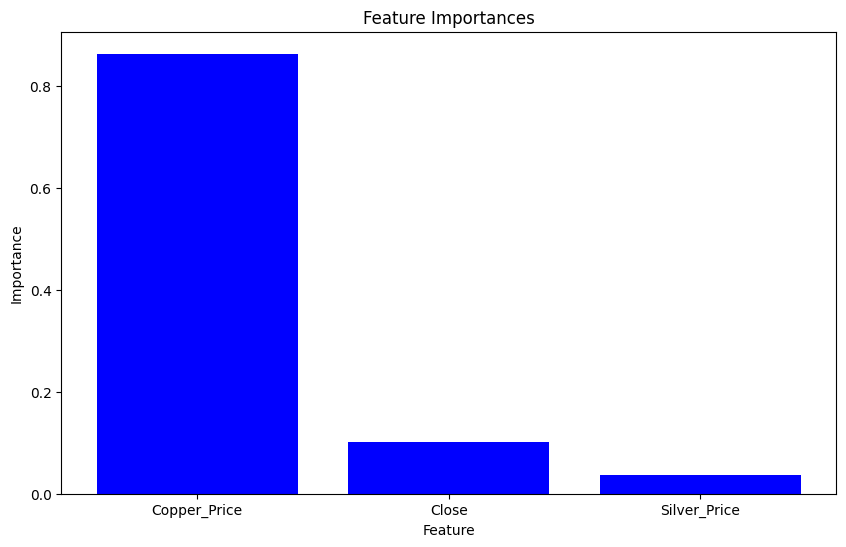

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Select features and target variable for ML
X = merged_data[['Copper_Price', 'Silver_Price', 'Close']]  # Example features
y = merged_data['Apple_Price']  # Target variable for Apple stock price in USD

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define a range of n_estimators to search
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best number of estimators
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best number of estimators:", best_n_estimators)

# Train the Random Forest model with the optimal number of estimators
optimal_rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
optimal_rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = optimal_rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error for Apple: {rf_mse}')

# Feature importance
importances = optimal_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'], color='b', align='center')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


Supervised Learning Model for Apple: Random Forest Regressor: Step 2 --> applying the estimator found above

In [57]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Select features and target variable for ML
X = merged_data[['Copper_Price', 'Silver_Price', 'Close']]  # Example features
y = merged_data['Apple_Price']  # Target variable for Samsung stock price in USD

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error for Apple: {rf_mse}')

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance_df)


Random Forest Mean Squared Error for Apple: 101.31075466555096
        feature  importance
0  Copper_Price    0.863220
2         Close    0.100348
1  Silver_Price    0.036432


Supervised Learning Model: kNN (k Nearest Neighbors) for Samsung: Step 1 --> choosing K values with elbow method and cross-validation

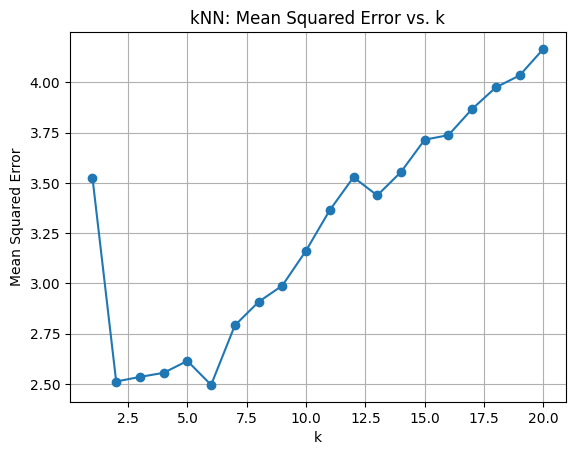

Best k value: 3


In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')
# Perform kNN for various k values and calculate MSE
k_values = range(1, 21)  # Example range from 1 to 20
mse_values = []
# Extract features and target variable
features = merged_data[['Silver_Price', 'Copper_Price', 'Apple_Price']]
target_samsung = merged_data['Close']  # Closing price of Samsung stock

# Drop rows with missing values if any
merged_data.dropna(subset=['Silver_Price', 'Copper_Price', 'Apple_Price', 'Close'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_samsung, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE values for different k
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('kNN: Mean Squared Error vs. k')
plt.grid(True)
plt.show()

from sklearn.model_selection import cross_val_score
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())  # Convert negative MSE to positive

# Get the best k value based on cross-validation scores
best_k = k_values[cv_scores.index(min(cv_scores))]
print("Best k value:", best_k)

Supervised Learning Model: kNN (k Nearest Neighbors) for Samsung: Step 2 --> applying the k value that found above

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')
global_phone_sales = pd.read_csv('global_phone_sales.csv', delimiter=';')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')
global_phone_sales.columns = ['Index', 'Date', 'Number_of_smartphones_sold']
global_phone_sales['Date'] = pd.to_datetime(global_phone_sales['Date'].astype(str) + '-01-01')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Extract Year from Date columns
stock_prices['Year'] = stock_prices['Date'].dt.year
samsung_stock['Year'] = samsung_stock['Date'].dt.year
global_phone_sales['Year'] = global_phone_sales['Date'].dt.year

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Extract features and target variable
features = merged_data[['Silver_Price', 'Copper_Price', 'Apple_Price']]
target_samsung = merged_data['Close']  # Closing price of Samsung stock

# Drop rows with missing values if any
merged_data.dropna(subset=['Silver_Price', 'Copper_Price', 'Apple_Price', 'Close'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_samsung, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the kNN model
k = 3  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("kNN Mean Squared Error for Samsung:", mse)




kNN Mean Squared Error for Samsung: 2.535464700094163


Supervised Learning Model: kNN (k Nearest Neighbors) for Apple: Step 1 --> choosing K values with elbow method and cross-validation

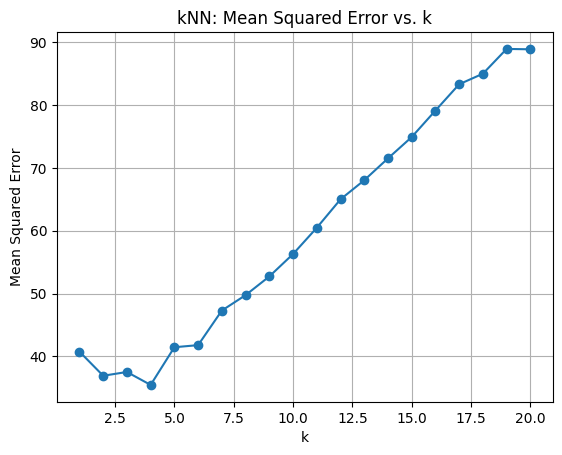

Best k value: 4


In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')
# Perform kNN for various k values and calculate MSE
k_values = range(1, 21)  # Example range from 1 to 20
mse_values = []
# Extract features and target variable
features = merged_data[['Silver_Price', 'Copper_Price', 'Close']]
target_apple = merged_data['Apple_Price']  # Apple stock price

# Drop rows with missing values if any
merged_data.dropna(subset=['Silver_Price', 'Copper_Price', 'Apple_Price', 'Close'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_apple, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE values for different k
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('kNN: Mean Squared Error vs. k')
plt.grid(True)
plt.show()

from sklearn.model_selection import cross_val_score
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())  # Convert negative MSE to positive

# Get the best k value based on cross-validation scores
best_k = k_values[cv_scores.index(min(cv_scores))]
print("Best k value:", best_k)

Supervised Learning Model: kNN (k Nearest Neighbors) for Apple: Step 2 --> applying the k value that found above

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load datasets
stock_prices = pd.read_csv('Stock Market Dataset.csv')
samsung_stock = pd.read_csv('005930.KS.csv')
global_phone_sales = pd.read_csv('global_phone_sales.csv', delimiter=';')

# Convert Date columns to datetime
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%d-%m-%Y')
samsung_stock['Date'] = pd.to_datetime(samsung_stock['Date'], format='%Y-%m-%d')
global_phone_sales.columns = ['Index', 'Date', 'Number_of_smartphones_sold']
global_phone_sales['Date'] = pd.to_datetime(global_phone_sales['Date'].astype(str) + '-01-01')

# Convert Samsung stock prices from KRW to USD
conversion_rate_krw_to_usd = 0.00074
samsung_stock[['Open', 'High', 'Low', 'Close', 'Adj Close']] *= conversion_rate_krw_to_usd

# Extract Year from Date columns
stock_prices['Year'] = stock_prices['Date'].dt.year
samsung_stock['Year'] = samsung_stock['Date'].dt.year
global_phone_sales['Year'] = global_phone_sales['Date'].dt.year

# Merge stock_prices and samsung_stock on Date
merged_data = pd.merge(stock_prices, samsung_stock, on='Date', how='inner')

# Extract features and target variable
features = merged_data[['Silver_Price', 'Copper_Price', 'Close']]
target_apple = merged_data['Apple_Price']  # Closing price of Apple stock

# Drop rows with missing values if any
merged_data.dropna(subset=['Silver_Price', 'Copper_Price', 'Apple_Price', 'Close'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_samsung, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the kNN model
k = 4  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("kNN Mean Squared Error for Apple:", mse)




kNN Mean Squared Error for Apple: 0.17723075450211884
